In [17]:
import pandas as pd
import plotnine as pn

In [18]:
house_data_clean = pd.read_csv('./data/house-price-data.csv', index_col='Id')
house_data_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [34]:
house_data_clean.corr()

ValueError: could not convert string to float: 'C (all)'

In [19]:
house_data = house_data_clean.copy()

# house_data["LotArea"] = house_data["LotArea"] // 1_000
# house_data['LotAreaNormalized'] = house_data['LotArea'].where(house_data['LotArea'] < 50, 50)

feature_to_check = "Neighborhood"

In [20]:
# house_data["LotFrontage"] = house_data["LotFrontage"].clip(0, 100)
# house_data["LotFrontage"] = house_data["LotFrontage"] // 10 * 10

In [21]:
# house_data["Functional"] = house_data["Functional"].where(house_data["Functional"] == "Typ", "Deduction")
# house_data

In [22]:
# house_data["UsefulArea"] = house_data["TotalBsmtSF"] + house_data["1stFlrSF"] + house_data["2ndFlrSF"] + house_data[
#     "GarageArea"]
# house_data["UsefulArea"] = house_data["UsefulArea"].clip(1_000, 5_000)
# house_data["UsefulArea"] = house_data["UsefulArea"] // 100 * 100
# house_data

In [23]:
# house_data[[feature_to_check, 'SalePrice']].corr()

In [24]:
# house_data["LotArea"] = house_data["LotArea"].where(house_data["LotArea"] < 20_000, 20_000)
# house_data["LotArea"] = house_data["LotArea"] // 1_000 

In [25]:
# house_data = house_data[
#     house_data["SaleCondition"] == "Normal"
#     ]

In [26]:
house_data_count = house_data.value_counts(feature_to_check).reset_index()
house_data_count

,Neighborhood,count
0,NAmes,225
1,CollgCr,150
2,OldTown,113
3,Edwards,100
4,Somerst,86
5,Gilbert,79
6,NridgHt,77
7,Sawyer,74
8,NWAmes,73
9,SawyerW,59


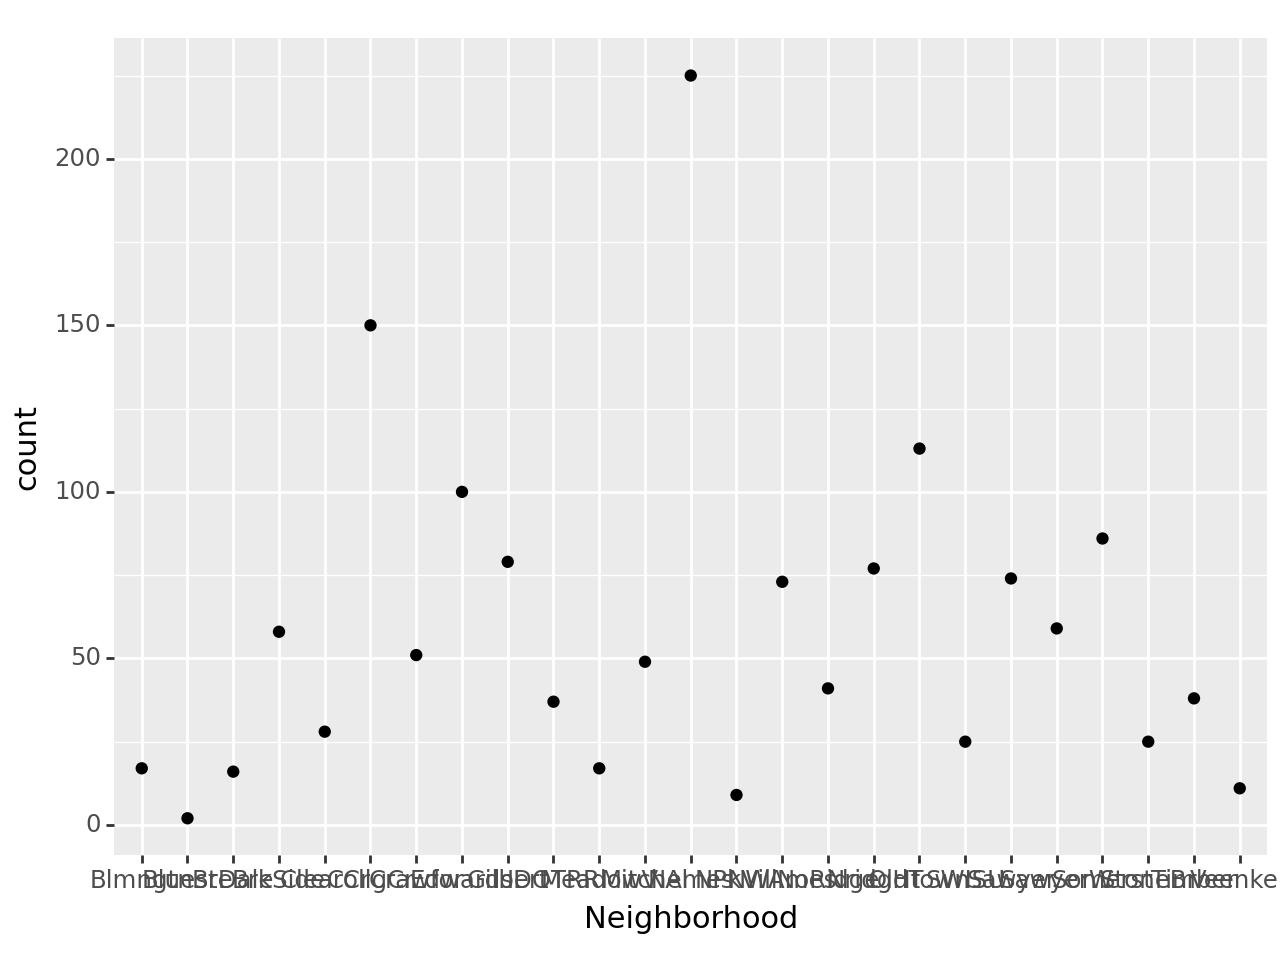

In [27]:
graph = (
        pn.ggplot(
            house_data_count,
            pn.aes(x=feature_to_check, y="count"),
        )
        + pn.geom_point()
)

graph.draw()

In [28]:
house_data_group_price = house_data.groupby(feature_to_check)["SalePrice"].mean().reset_index()
house_data_group_price

,Neighborhood,SalePrice
0,Blmngtn,194870.882353
1,Blueste,137500.000000
2,BrDale,104493.750000
3,BrkSide,124834.051724
4,ClearCr,212565.428571
5,CollgCr,197965.773333
6,Crawfor,210624.725490
7,Edwards,128219.700000
8,Gilbert,192854.506329
9,IDOTRR,100123.783784


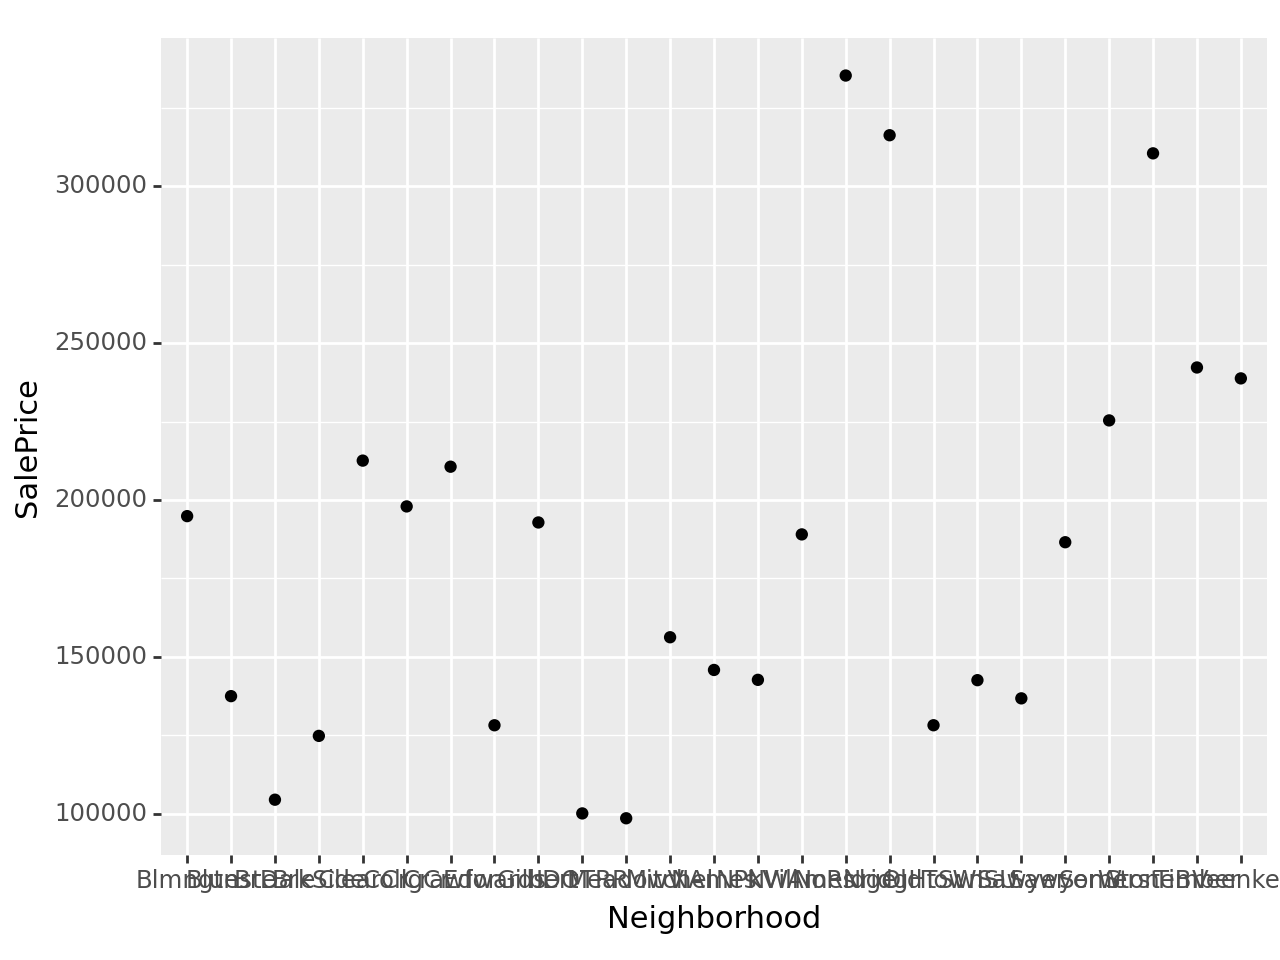

In [29]:
graph = (
        pn.ggplot(
            house_data_group_price,
            pn.aes(x=feature_to_check, y="SalePrice"),
        )
        + pn.geom_point()
)

graph.draw()

RANDOM STUFF

In [30]:
house_data_neighborhood = house_data.groupby('Neighborhood').agg(
    {"LotArea": ["mean"], "SalePrice": ["mean"]}).reset_index()
house_data_neighborhood = house_data_neighborhood.sort_values(by=('LotArea', 'mean'))
house_data_neighborhood

,Neighborhood,LotArea,SalePrice
,,mean,mean
1,Blueste,1625.000000,137500.000000
2,BrDale,1801.000000,104493.750000
10,MeadowV,2324.000000,98576.470588
13,NPkVill,3267.444444,142694.444444
0,Blmngtn,3398.176471,194870.882353
3,BrkSide,7360.413793,124834.051724
21,Somerst,7840.872093,225379.837209
9,IDOTRR,8109.162162,100123.783784
18,SWISU,8127.560000,142591.360000


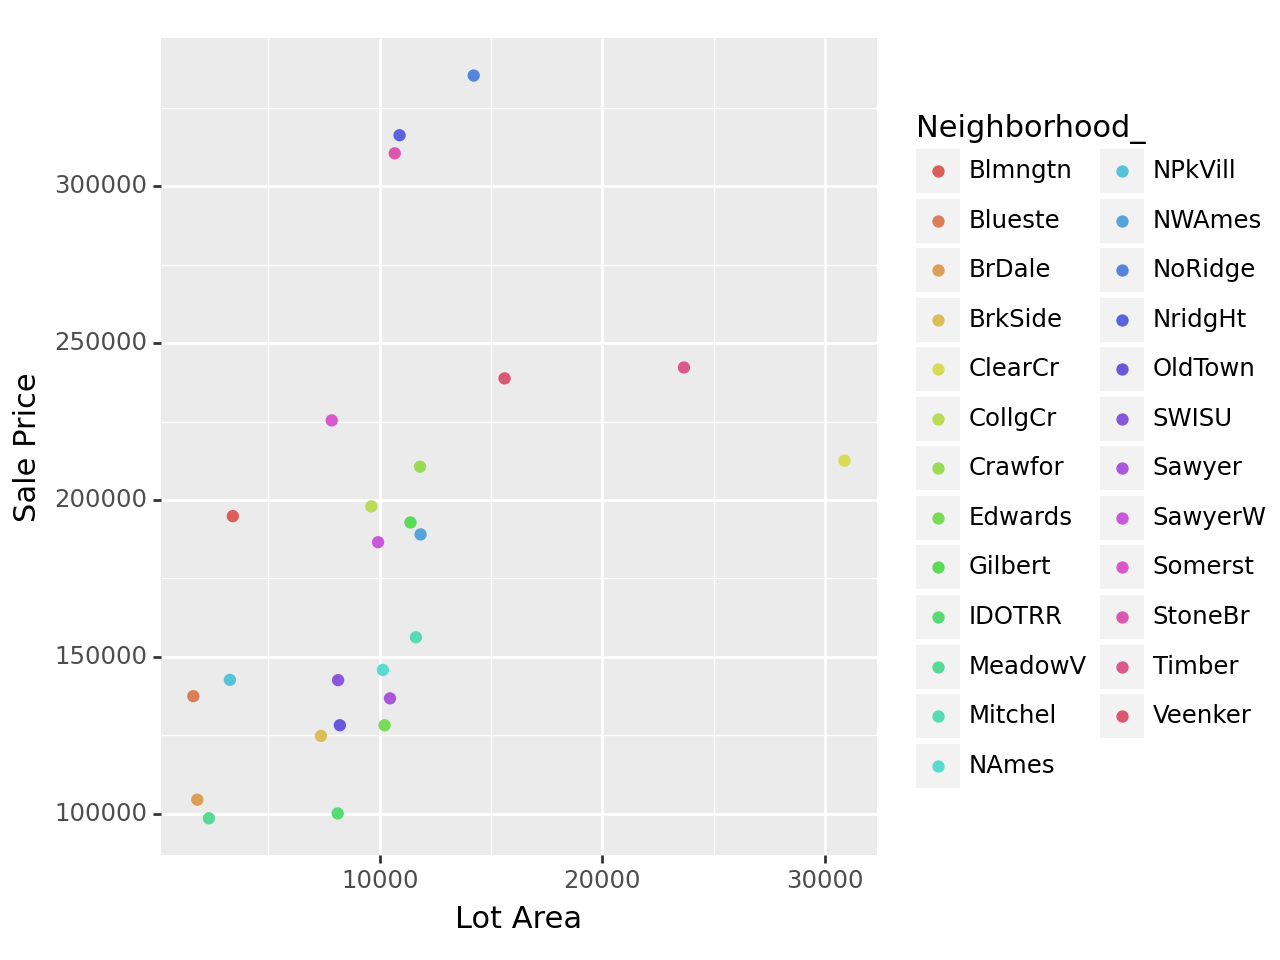

In [31]:
house_data_neighborhood.columns = ['_'.join(col) for col in house_data_neighborhood.columns]

graph = (
        pn.ggplot(house_data_neighborhood) +
        pn.aes(x='LotArea_mean', y='SalePrice_mean', color='Neighborhood_') +
        pn.geom_point() +
        pn.labs(x='Lot Area', y='Sale Price')
)

graph.draw()

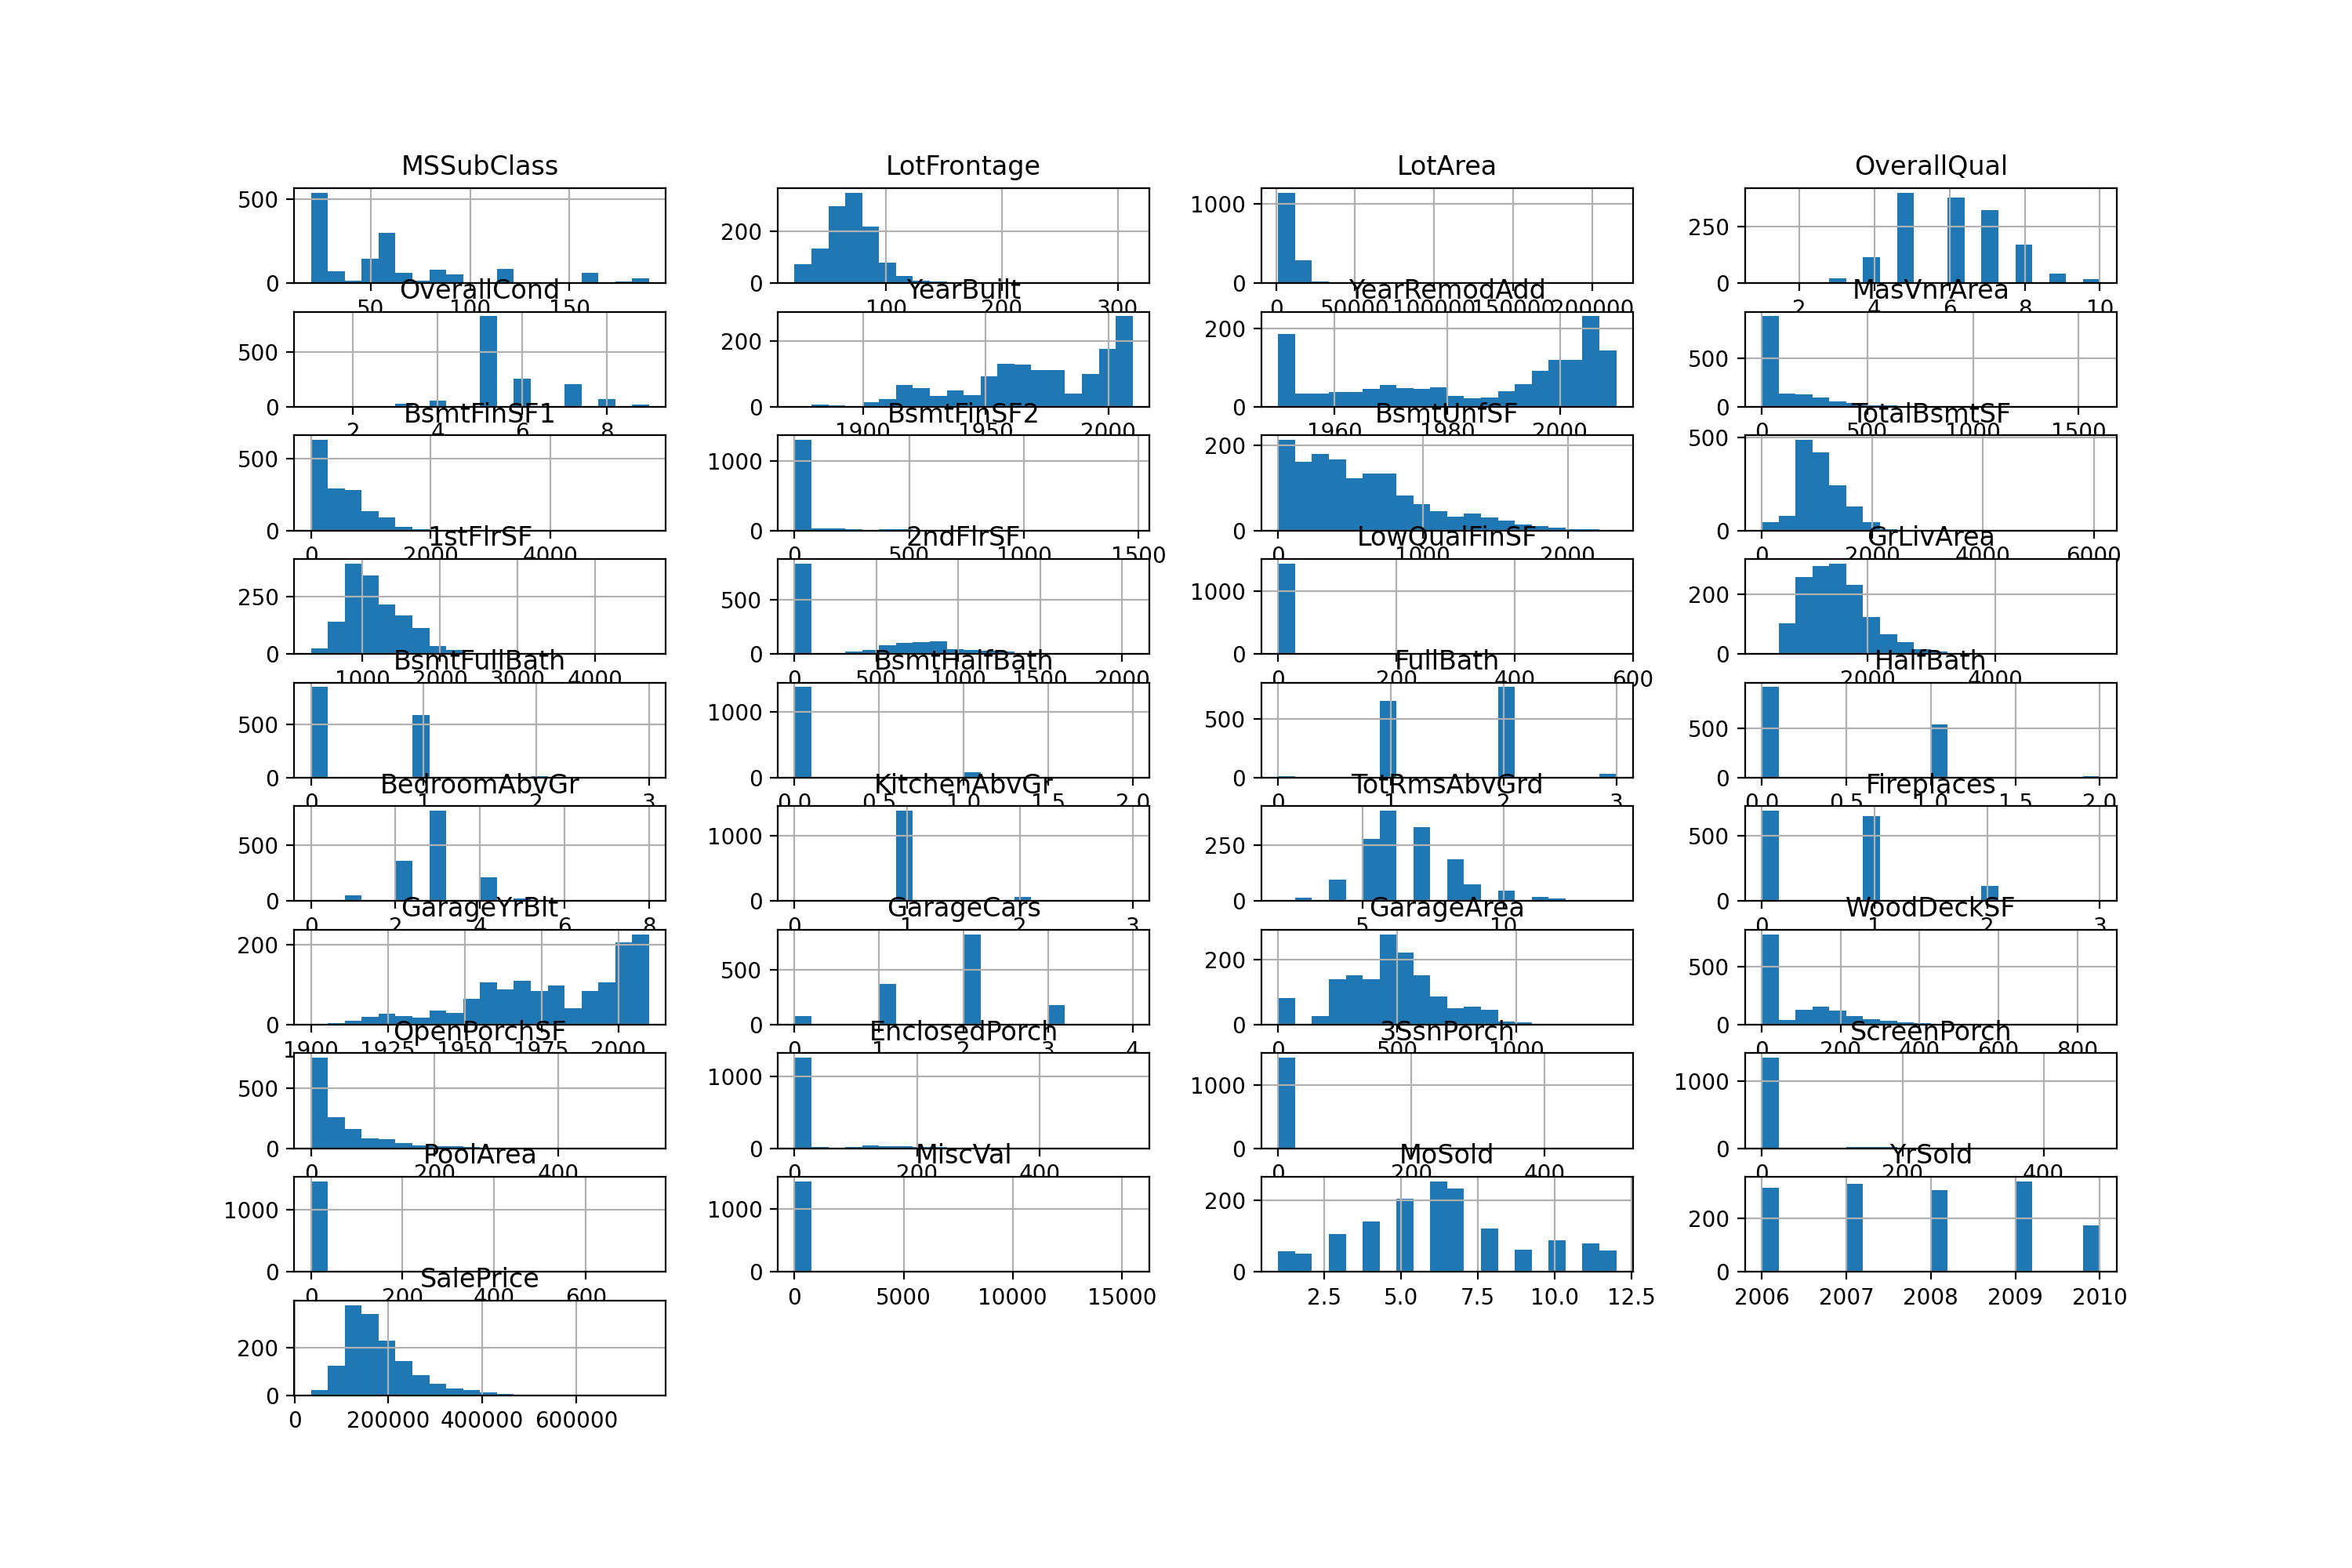

In [44]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
house_data.hist(bins=20, figsize=(15, 10), layout=(10, 4))

# Display the plot
plt.show()

In [51]:
house_data_group_price = house_data.groupby("Neighborhood")["SalePrice"].mean().reset_index()
house_data_group_price_sorted = house_data_group_price.sort_values(by="SalePrice")
house_data_group_price_sorted["Neighborhood"]

10    MeadowV
9      IDOTRR
2      BrDale
3     BrkSide
7     Edwards
17    OldTown
19     Sawyer
1     Blueste
18      SWISU
13    NPkVill
12      NAmes
11    Mitchel
20    SawyerW
14     NWAmes
8     Gilbert
0     Blmngtn
5     CollgCr
6     Crawfor
4     ClearCr
21    Somerst
24    Veenker
23     Timber
22    StoneBr
16    NridgHt
15    NoRidge
Name: Neighborhood, dtype: object